In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.core.interactiveshell import no_op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,classification_report,confusion_matrix,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DataSets/gld_price_data.csv')
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
data.shape

(2290, 6)

In [9]:
data.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [10]:
data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [11]:
data.dropna()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [12]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2285,False
2286,False
2287,False
2288,False


In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.drop_duplicates()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [15]:
data.shape

(2290, 6)

In [16]:
data['Date']= pd.to_datetime(data['Date'])
data = data.sort_values('Date')

In [17]:
data.corr()

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

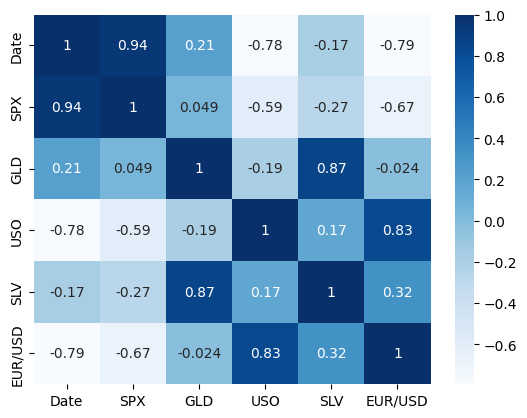

In [18]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [19]:
x= data.drop(['GLD','Date'], axis=1)
y = data['GLD']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
scaler =  StandardScaler()
x_trained_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
model = RandomForestRegressor()
model.fit(x_trained_scaled,y_train)

RandomForestRegressor()

In [23]:
y_pred = model.predict(x_test_scaled)
y_pred

array([122.44099944, 130.6571031 , 127.53610043,  96.5207974 ,
       118.8796005 , 114.84489968, 124.8873013 , 117.71169944,
       108.06960129,  98.63919973,  95.21219915, 167.91289861,
       151.63900026, 116.24220019, 170.86170099,  84.99469989,
       123.08849894, 109.15399733, 113.19350097, 131.36460291,
       124.30689917, 113.44150093, 115.72220006, 108.75489982,
       108.76800159, 125.82699915, 120.0266996 , 112.19049938,
       113.50210128, 125.47649885, 146.14250157,  89.54990003,
       167.60219944, 113.85839969, 108.35770097, 120.08790098,
       141.3751984 , 161.29740107, 173.93399776, 153.01520147,
       119.25490116, 113.66660095, 121.46519929, 113.65079926,
       122.00087578, 108.11110085,  88.49199898, 114.48489901,
       129.8894026 , 117.75290115, 103.5576007 , 129.8707028 ,
       107.20509841, 160.54010398, 131.33680035, 118.3819995 ,
       147.0504005 , 136.57240232,  95.63430129, 124.51750132,
       115.20489879,  86.01300094, 104.3809987 , 113.98

In [24]:
training_acc = model.score(x_trained_scaled,y_train)
print(training_acc * 100)

99.86329689362144


In [25]:
testing_acc = model.score(x_test_scaled,y_test)
print(testing_acc * 100)

98.98059978629931


In [26]:
# no overfitting

In [27]:
r = r2_score(y_test,y_pred)
print(r)

0.9898059978629931


In [28]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

5.5893703081371084


In [29]:
mae = mean_absolute_error(y_test,y_pred)
print(mae)

1.2385771779257655


In [30]:
# finished